In [154]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [155]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 60

In [156]:
map_path = "/home/danielmtz/Data/datasets/CarlaBEV/maps/Town01/Town01-1024-RGB.jpg"

In [157]:
class Map(object):
    def __init__(self) -> None:
        self._map_arr = np.array(Image.open(map_path))
        self._X, self._Y, _ = self._map_arr.shape
        self._win_size = 1024
        self._xmin = self._X - self._win_size
        self._ymin = 0
    
    def move_sliding_window(self, direction):
        self._xmin = np.clip(
            self._xmin + direction[0], 0, self._X - self._win_size - 1
        )
        self._ymin = np.clip(
            self._ymin + direction[1], 0, self._Y - self._win_size - 1
        )

    def _get_fov(self):
        return self._map_arr[self._xmin:self._xmin + self._win_size,
                              self._ymin: self._ymin + self._win_size] 
        

    def get_map(self):
        return self._get_fov()

    @property
    def map(self) -> np.array:
        return self._map_arr


In [158]:
map = Map()

In [159]:
map.map.shape

(8192, 6144, 3)

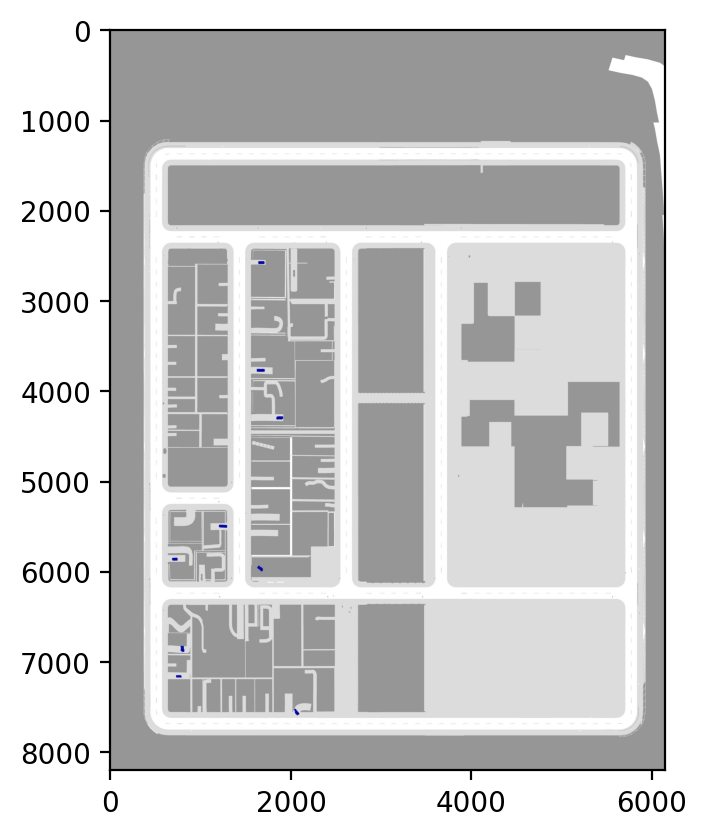

In [160]:
plt.imshow(map.map)
plt.show()

In [161]:
location = np.array([512, 512])
fov = map.get_map()
fov.shape

(1024, 1024, 3)

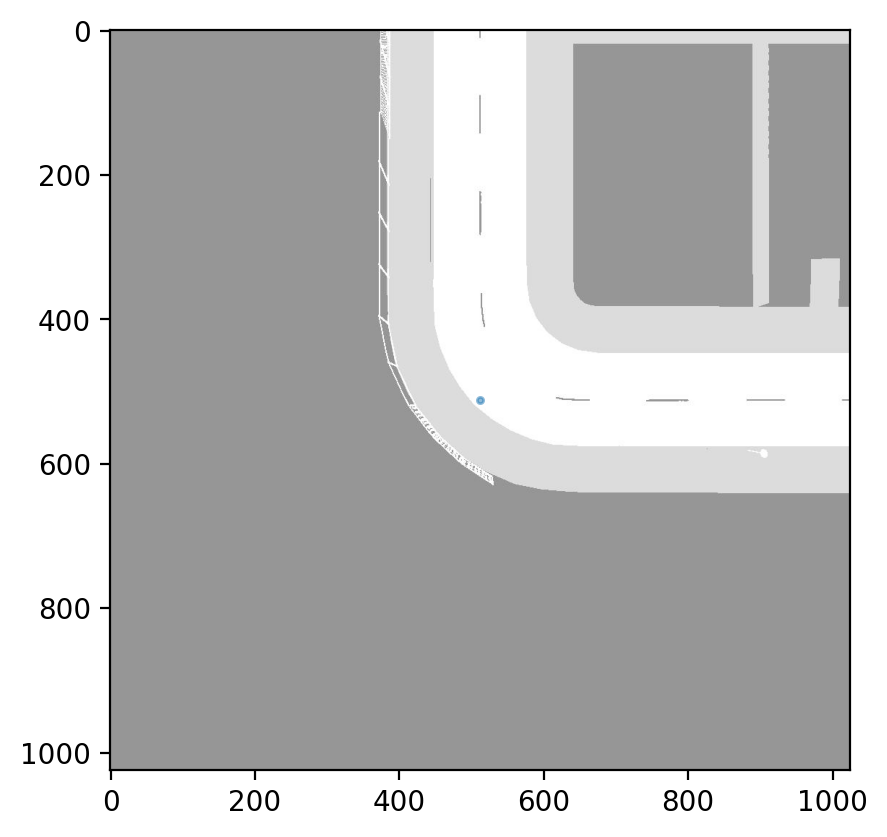

In [162]:
plt.imshow(fov)
plt.scatter(x=512, y=512, s=5, alpha=0.5)
plt.show()

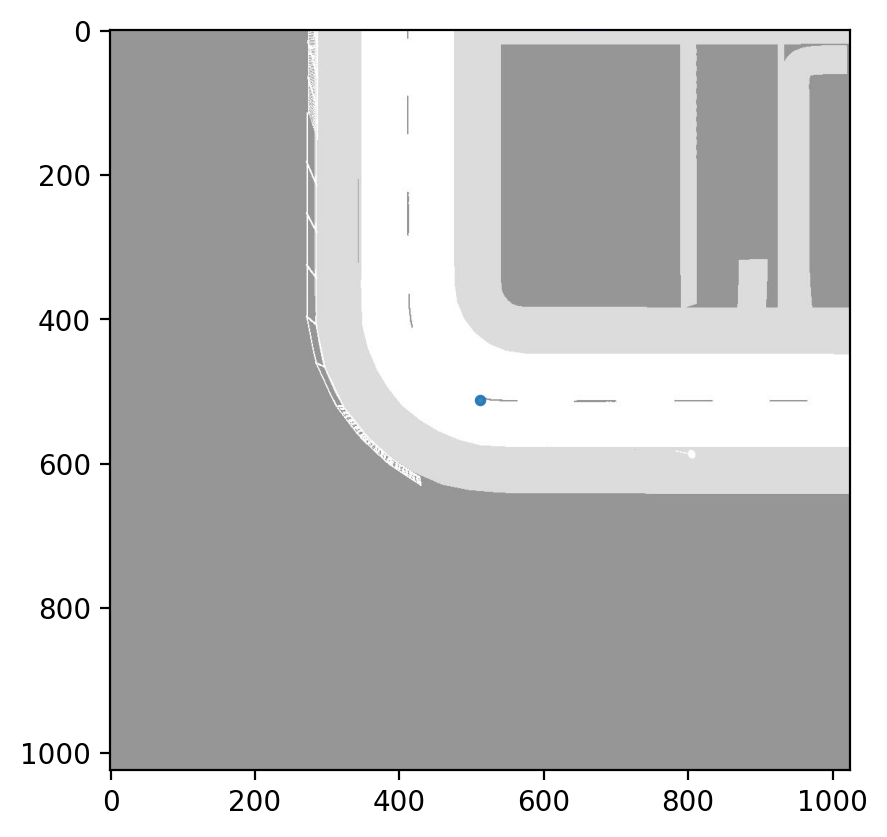

In [163]:
direction = np.array([0, 100])
map.move_sliding_window(direction)
fov = map.get_map()

plt.imshow(fov)
plt.scatter(x=512, y=512, s=10, alpha=0.9)
plt.show()
